# Importing Libraries

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading and Seeing the Dataset

In [234]:
df = pd.read_csv("messy_customer_data.csv")

In [235]:
df

,Customer_ID,Age,Gender,Annual_Income,Spending_Score,City,Purchased
0,1,50.0,Male,50000.0,NaN,Mumbai,N
1,2,35.0,NaN,50000.0,10.0,NaN,Yes
2,3,NaN,Male,20000.0,50.0,NaN,No
3,4,40.0,Male,999999.0,NaN,Delhi,No
4,5,50.0,NaN,70000.0,50.0,NaN,NaN
...,...,...,...,...,...,...,...
495,496,18.0,male,50000.0,120.0,NaN,No
496,497,50.0,M,50000.0,120.0,Pune,Y
497,498,50.0,Male,999999.0,10.0,NaN,Y
498,499,150.0,Female,70000.0,120.0,Pune,Yes


In [236]:
df.shape

(500, 7)

In [237]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Annual_Income', 'Spending_Score',
       'City', 'Purchased'],
      dtype='object')

In [238]:
df.describe()

,Customer_ID,Age,Annual_Income,Spending_Score
count,500.000000,449.000000,414.000000,426.000000
mean,250.500000,40.815145,231110.913043,43.333333
std,144.481833,39.360390,382943.116516,34.568488
min,1.000000,-5.000000,20000.000000,10.000000
25%,125.750000,18.000000,30000.000000,20.000000
50%,250.500000,35.000000,50000.000000,30.000000
75%,375.250000,45.000000,70000.000000,50.000000
max,500.000000,150.000000,999999.000000,120.000000


In [239]:
df.duplicated().sum()

np.int64(0)

In [240]:
df.dtypes

Customer_ID         int64
Age               float64
Gender             object
Annual_Income     float64
Spending_Score    float64
City               object
Purchased          object
dtype: object

# Handling Missing Values

In [241]:
df

,Customer_ID,Age,Gender,Annual_Income,Spending_Score,City,Purchased
0,1,50.0,Male,50000.0,NaN,Mumbai,N
1,2,35.0,NaN,50000.0,10.0,NaN,Yes
2,3,NaN,Male,20000.0,50.0,NaN,No
3,4,40.0,Male,999999.0,NaN,Delhi,No
4,5,50.0,NaN,70000.0,50.0,NaN,NaN
...,...,...,...,...,...,...,...
495,496,18.0,male,50000.0,120.0,NaN,No
496,497,50.0,M,50000.0,120.0,Pune,Y
497,498,50.0,Male,999999.0,10.0,NaN,Y
498,499,150.0,Female,70000.0,120.0,Pune,Yes


## Converting empty string to NAN

In [242]:
cat_cols = df.select_dtypes(include="object").columns
cat_cols

Index(['Gender', 'City', 'Purchased'], dtype='object')

In [243]:
df[cat_cols] = df[cat_cols].replace("", np.nan)

print("Empty strings converted to NaN")

Empty strings converted to NaN


In [244]:
print(df[cat_cols].isnull().sum())

Gender        86
City         168
Purchased    110
dtype: int64


## Handling Age Column

In [245]:
df['Age']

0       50.0
1       35.0
2        NaN
3       40.0
4       50.0
       ...  
495     18.0
496     50.0
497     50.0
498    150.0
499     30.0
Name: Age, Length: 500, dtype: float64

In [246]:
df['Age'].value_counts()

Age
 18.0     62
 30.0     57
 50.0     55
-5.0      54
 40.0     49
 35.0     48
 150.0    44
 25.0     41
 45.0     39
Name: count, dtype: int64

In [247]:
df['Age'] = df['Age'].mask((df['Age'] < 0) | (df['Age'] > 100), np.nan)

In [248]:
df['Age'].value_counts()

Age
18.0    62
30.0    57
50.0    55
40.0    49
35.0    48
25.0    41
45.0    39
Name: count, dtype: int64

In [249]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [250]:
df['Age']

0      50.0
1      35.0
2      35.0
3      40.0
4      50.0
       ... 
495    18.0
496    50.0
497    50.0
498    35.0
499    30.0
Name: Age, Length: 500, dtype: float64

## Handling Gender Column

In [251]:
df['Gender']

0        Male
1         NaN
2        Male
3        Male
4         NaN
        ...  
495      male
496         M
497      Male
498    Female
499         F
Name: Gender, Length: 500, dtype: object

In [252]:
df['Gender'].value_counts()

Gender
male      90
Male      88
Female    81
F         78
M         77
Name: count, dtype: int64

In [253]:
df['Gender'].replace({
    'M': "Male",
    "male": "Male",
    'F': "Female",
    np.nan: "unknown"
}, inplace=True)

In [254]:
df['Gender'].value_counts()

Gender
Male       255
Female     159
unknown     86
Name: count, dtype: int64

In [255]:
df['Gender']

0         Male
1      unknown
2         Male
3         Male
4      unknown
        ...   
495       Male
496       Male
497       Male
498     Female
499     Female
Name: Gender, Length: 500, dtype: object

## Handling Annual_Income column

In [256]:
df['Annual_Income']

0       50000.0
1       50000.0
2       20000.0
3      999999.0
4       70000.0
         ...   
495     50000.0
496     50000.0
497    999999.0
498     70000.0
499         NaN
Name: Annual_Income, Length: 500, dtype: float64

In [257]:
df['Annual_Income'].value_counts()

Annual_Income
50000.0     91
20000.0     86
30000.0     86
999999.0    82
70000.0     69
Name: count, dtype: int64

In [258]:
df['Annual_Income'].fillna(df['Annual_Income'].median(), inplace=True)

In [259]:
df['Annual_Income']

0       50000.0
1       50000.0
2       20000.0
3      999999.0
4       70000.0
         ...   
495     50000.0
496     50000.0
497    999999.0
498     70000.0
499     50000.0
Name: Annual_Income, Length: 500, dtype: float64

## Handling Spending_Score Column

In [260]:
df['Spending_Score']

0        NaN
1       10.0
2       50.0
3        NaN
4       50.0
       ...  
495    120.0
496    120.0
497     10.0
498    120.0
499     40.0
Name: Spending_Score, Length: 500, dtype: float64

In [261]:
df['Spending_Score'].isnull().sum()

np.int64(74)

In [262]:
df['Spending_Score'].value_counts()

Spending_Score
10.0     74
50.0     74
30.0     74
40.0     71
20.0     70
120.0    63
Name: count, dtype: int64

In [263]:
df['Spending_Score'].fillna(df['Spending_Score'].median(), inplace=True)

## Handling City Column

In [264]:
df['City']

0      Mumbai
1         NaN
2         NaN
3       Delhi
4         NaN
        ...  
495       NaN
496      Pune
497       NaN
498      Pune
499     Delhi
Name: City, Length: 500, dtype: object

In [265]:
df['City'].value_counts()

City
Pune         94
Delhi        91
Mumbai       83
Ahmedabad    64
Name: count, dtype: int64

In [266]:
df['City'].replace({
    np.nan: "unknown",
}, inplace=True)

In [267]:
df['City'].value_counts()

City
unknown      168
Pune          94
Delhi         91
Mumbai        83
Ahmedabad     64
Name: count, dtype: int64

## Handling Purchased Score

In [268]:
df['Purchased']

0        N
1      Yes
2       No
3       No
4      NaN
      ... 
495     No
496      Y
497      Y
498    Yes
499    NaN
Name: Purchased, Length: 500, dtype: object

In [269]:
df['Purchased'].replace({
    np.nan: "unknown",
    "Y": "Yes",
    "N": "No",
}, inplace=True)

In [270]:
df['Purchased'].value_counts()

Purchased
No         210
Yes        180
unknown    110
Name: count, dtype: int64

In [271]:
df.value_counts()

Customer_ID  Age   Gender   Annual_Income  Spending_Score  City     Purchased
1            50.0  Male     50000.0        30.0            Mumbai   No           1
2            35.0  unknown  50000.0        10.0            unknown  Yes          1
3            35.0  Male     20000.0        50.0            unknown  No           1
4            40.0  Male     999999.0       30.0            Delhi    No           1
5            50.0  unknown  70000.0        50.0            unknown  unknown      1
                                                                                ..
496          18.0  Male     50000.0        120.0           unknown  No           1
497          50.0  Male     50000.0        120.0           Pune     Yes          1
498          50.0  Male     999999.0       10.0            unknown  Yes          1
499          35.0  Female   70000.0        120.0           Pune     Yes          1
500          30.0  Female   50000.0        40.0            Delhi    unknown      1
Name: cou

In [272]:
df.to_csv("cleaned_data.csv",index=False)

# Hanndling with Outliers using visualization

In [273]:
df

,Customer_ID,Age,Gender,Annual_Income,Spending_Score,City,Purchased
0,1,50.0,Male,50000.0,30.0,Mumbai,No
1,2,35.0,unknown,50000.0,10.0,unknown,Yes
2,3,35.0,Male,20000.0,50.0,unknown,No
3,4,40.0,Male,999999.0,30.0,Delhi,No
4,5,50.0,unknown,70000.0,50.0,unknown,unknown
...,...,...,...,...,...,...,...
495,496,18.0,Male,50000.0,120.0,unknown,No
496,497,50.0,Male,50000.0,120.0,Pune,Yes
497,498,50.0,Male,999999.0,10.0,unknown,Yes
498,499,35.0,Female,70000.0,120.0,Pune,Yes


In [274]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include="object").columns

In [275]:
num_cols

Index(['Customer_ID', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [276]:
cat_cols

Index(['Gender', 'City', 'Purchased'], dtype='object')

## Ploting to see outliers

In [277]:
plt.style.use("default")  # reset dark theme issues
sns.set_theme(style="whitegrid")

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["figure.dpi"] = 120

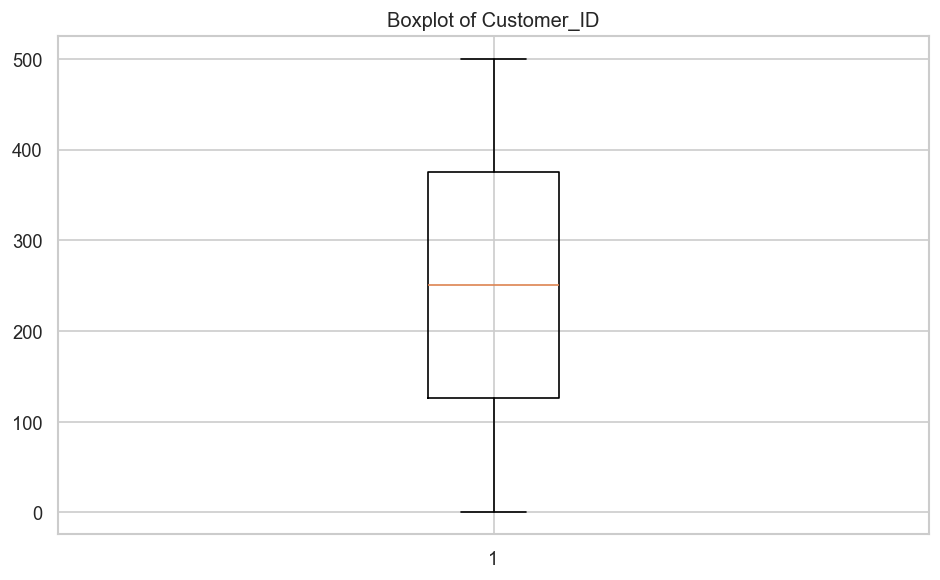

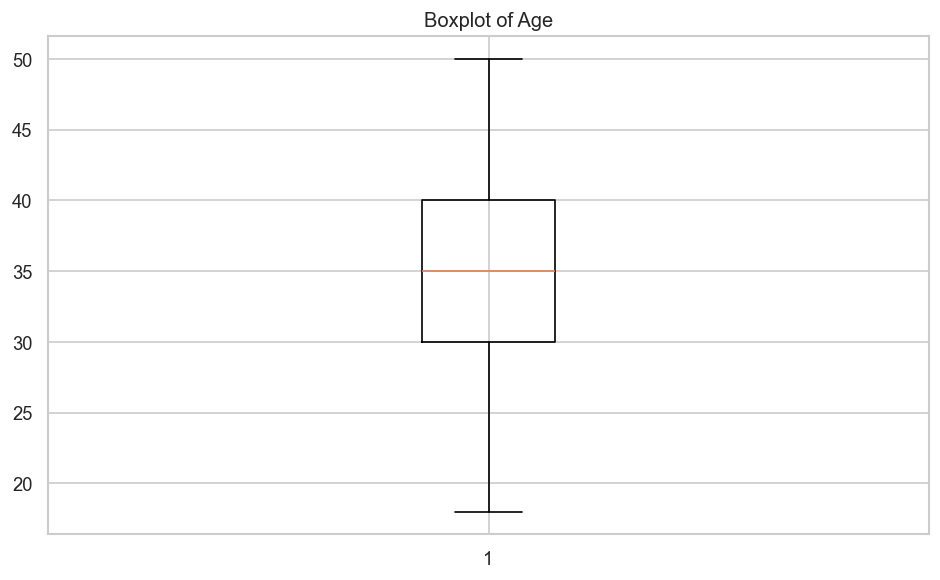

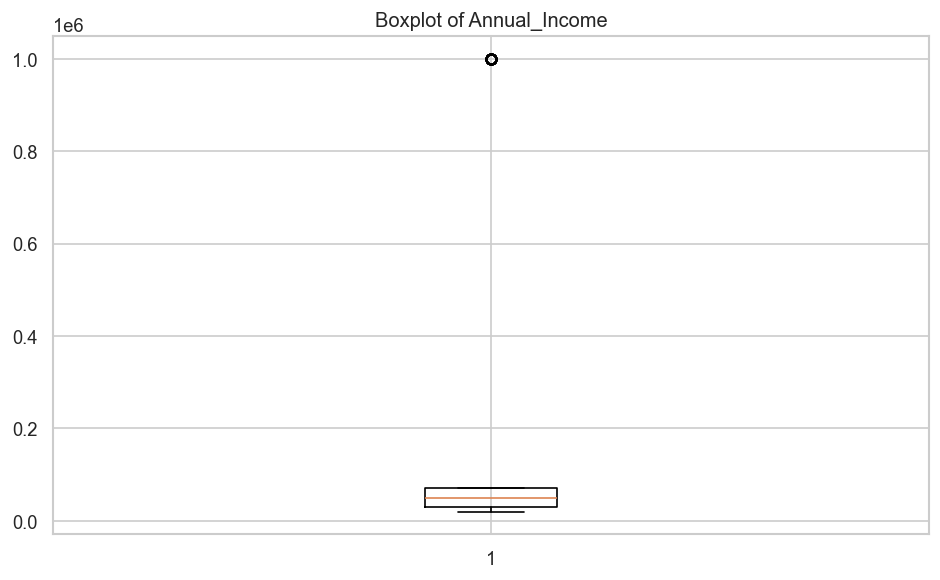

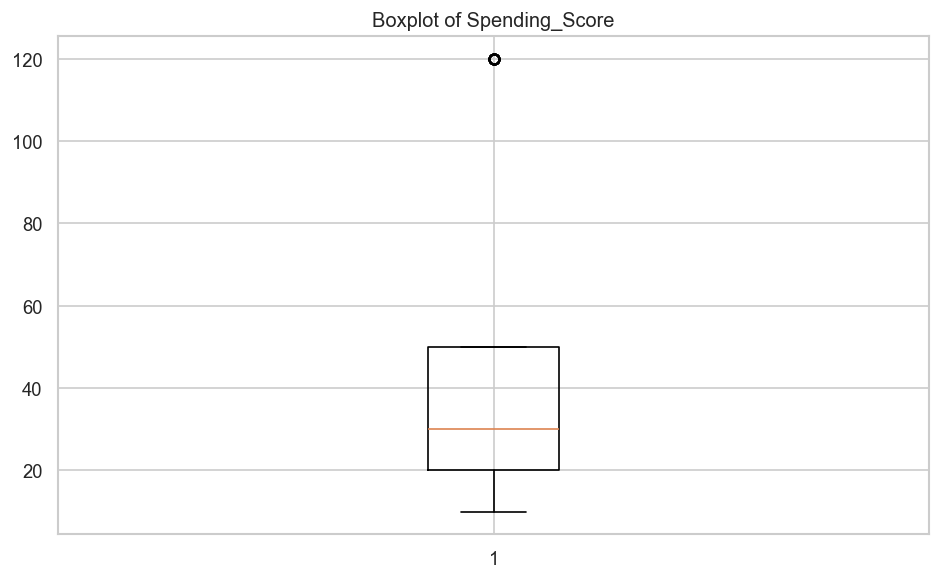

In [278]:
for col in num_cols:
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

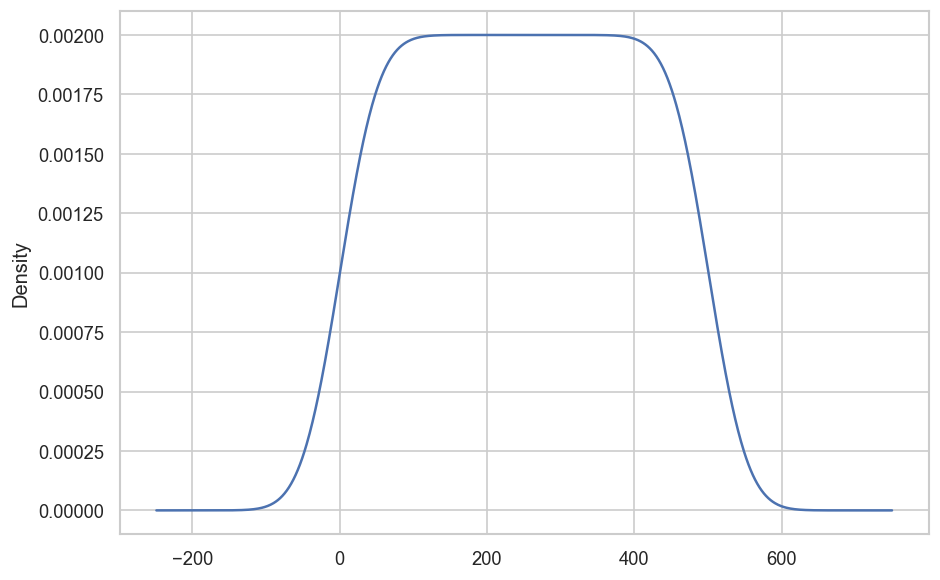

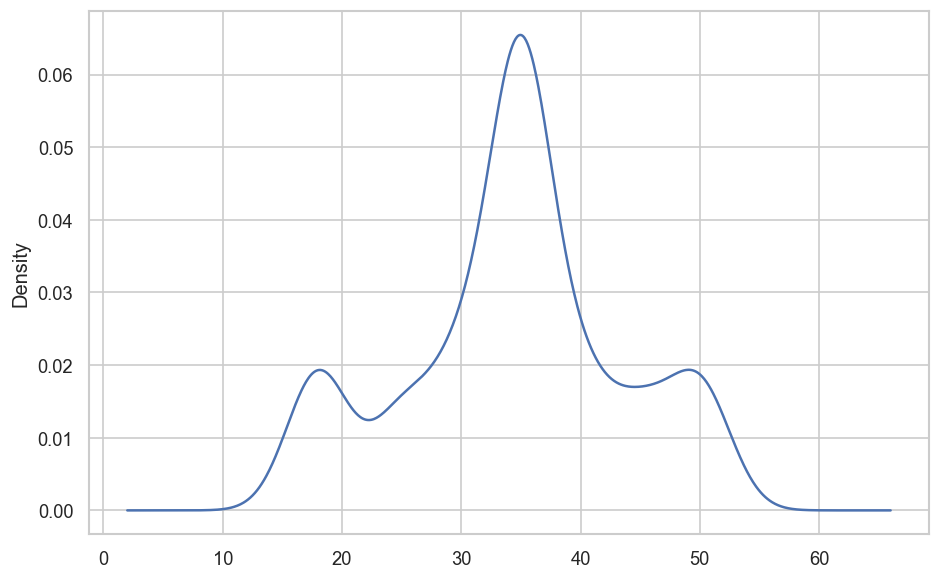

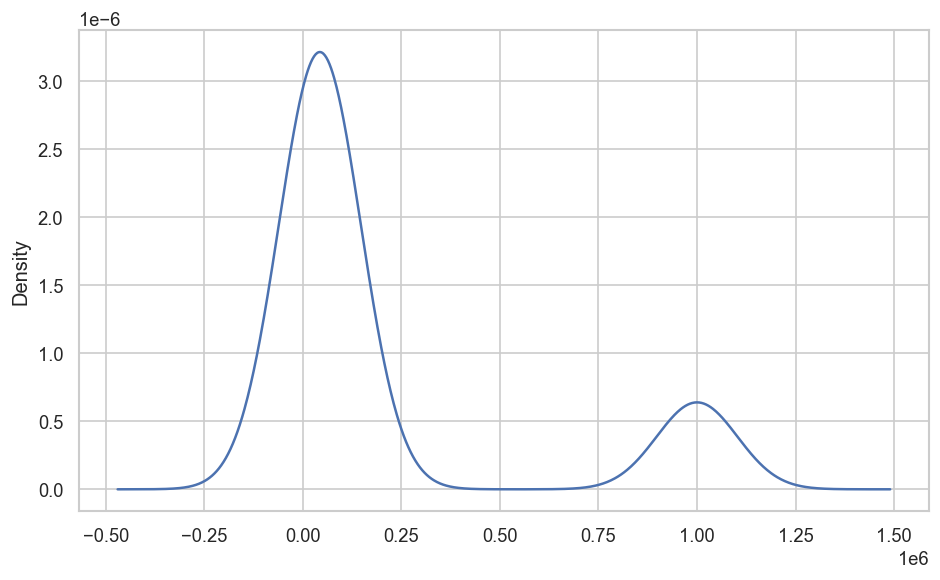

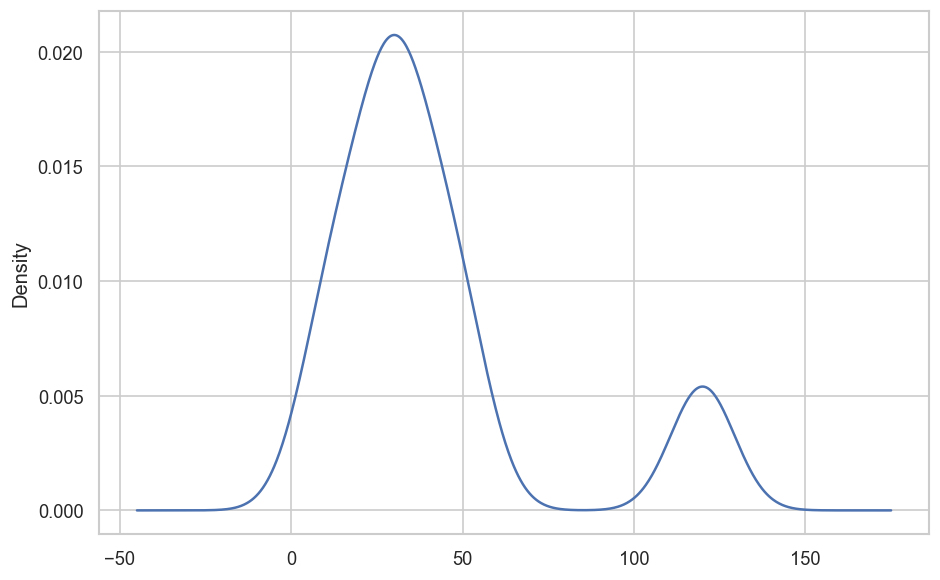

In [279]:
for col in num_cols:
    df[col].plot(kind="kde")
    plt.tight_layout()
    plt.show()

## Removing Outliers if detected

In [280]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(f"{col}: {outliers.shape[0]} outliers detected")

Customer_ID: 0 outliers detected
Age: 0 outliers detected
Annual_Income: 82 outliers detected
Spending_Score: 63 outliers detected


In [281]:
# =====================================
# OPTION C: Remove outliers
# =====================================

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("Outliers removed")

Outliers removed


## Ploting after removing outliers

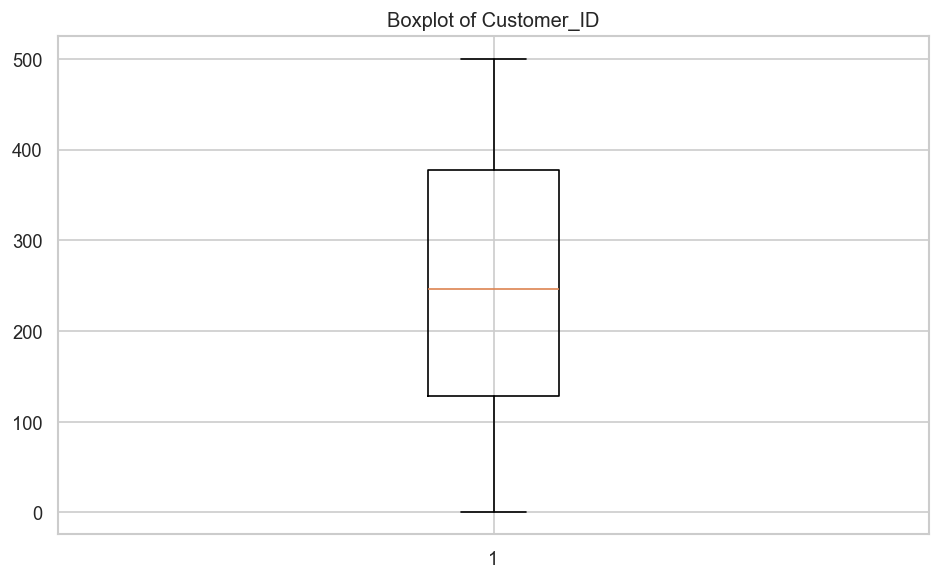

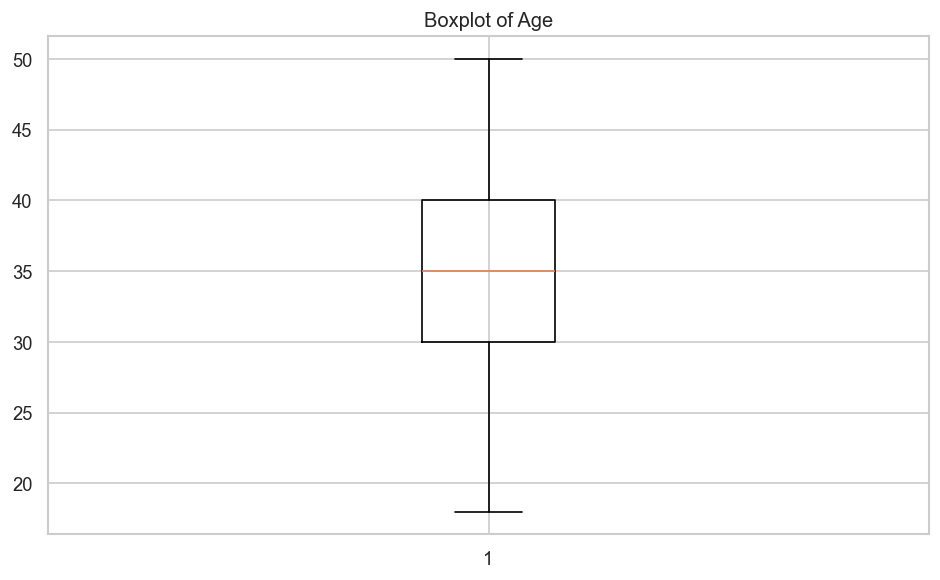

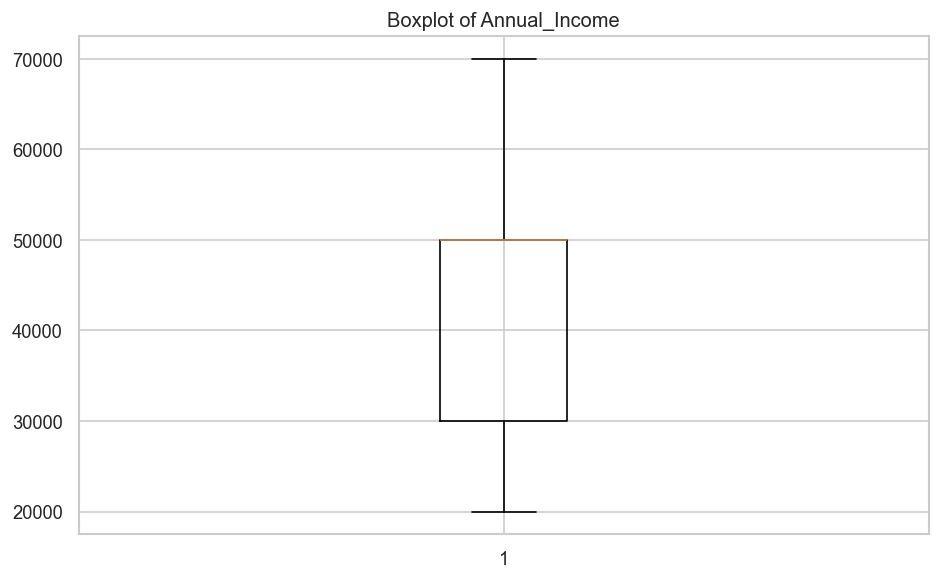

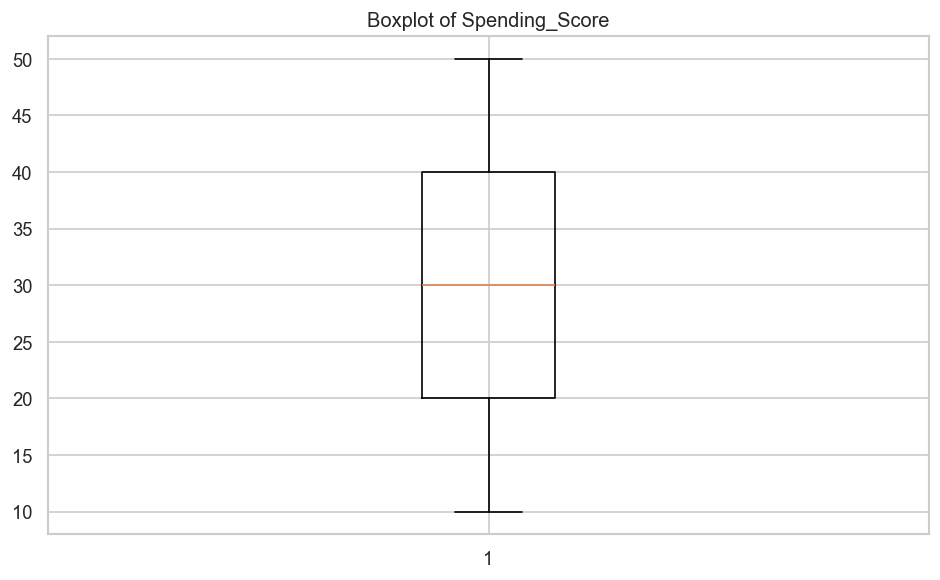

In [282]:
for col in num_cols:
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

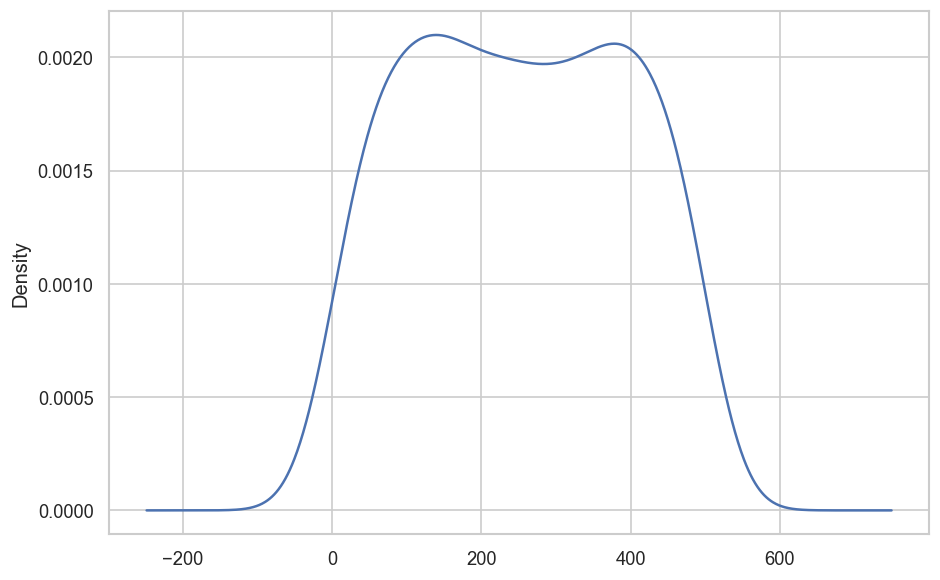

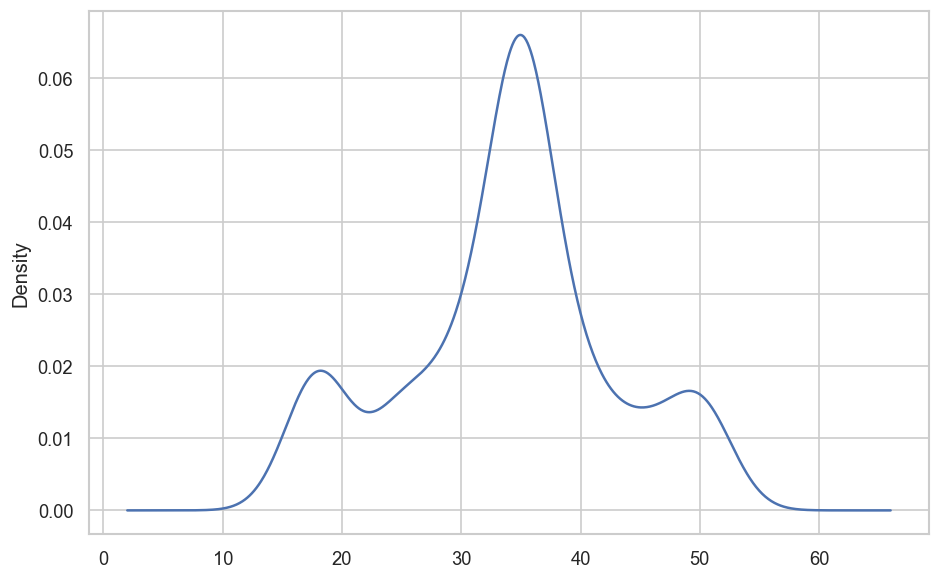

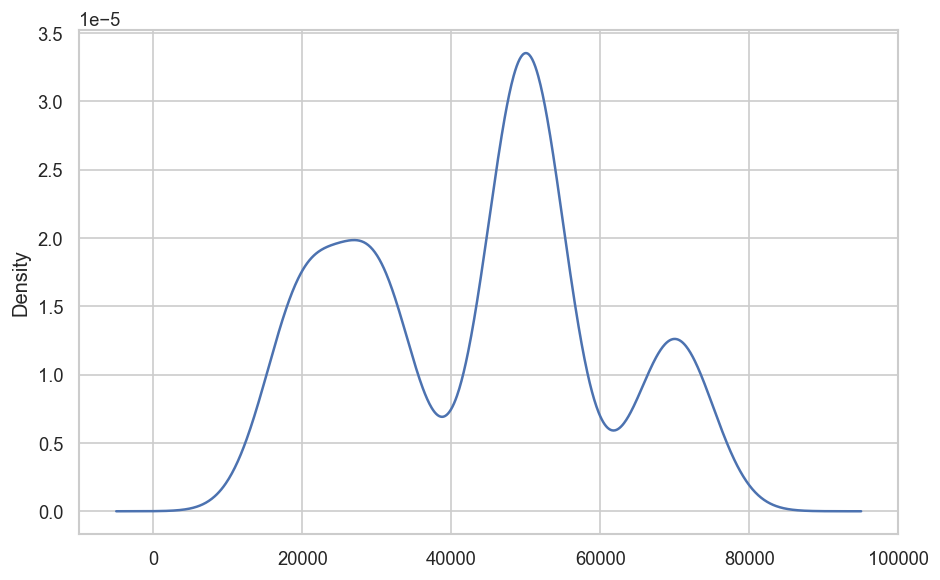

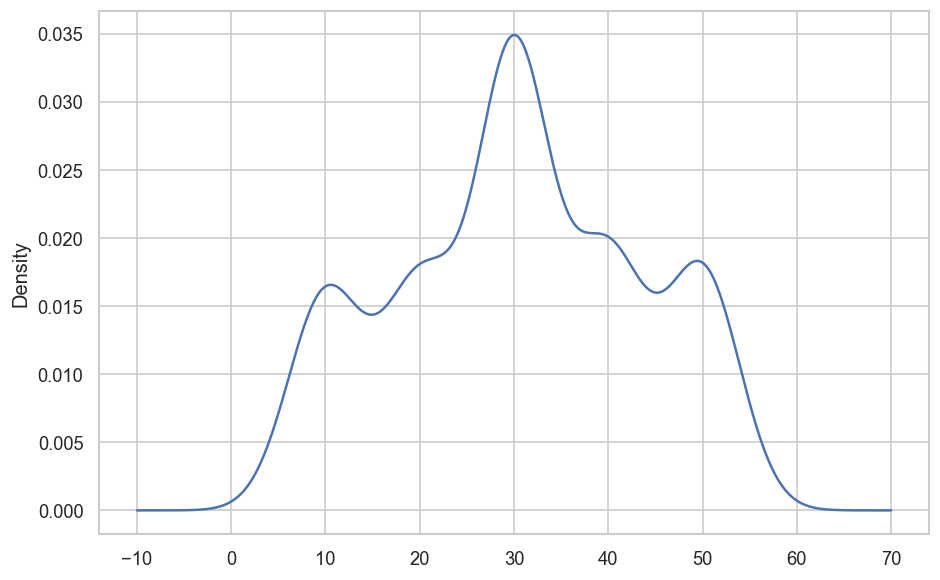

In [283]:
for col in num_cols:
    df[col].plot(kind="kde")
    plt.tight_layout()
    plt.show()

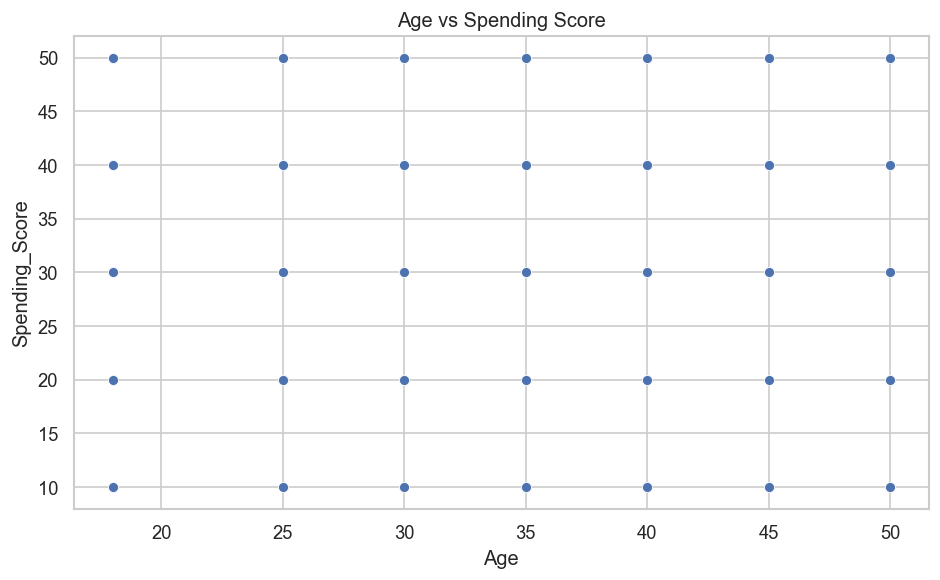

In [284]:
sns.scatterplot(
    x=df["Age"],
    y=df["Spending_Score"]
)
plt.title("Age vs Spending Score")
plt.tight_layout()
plt.show()

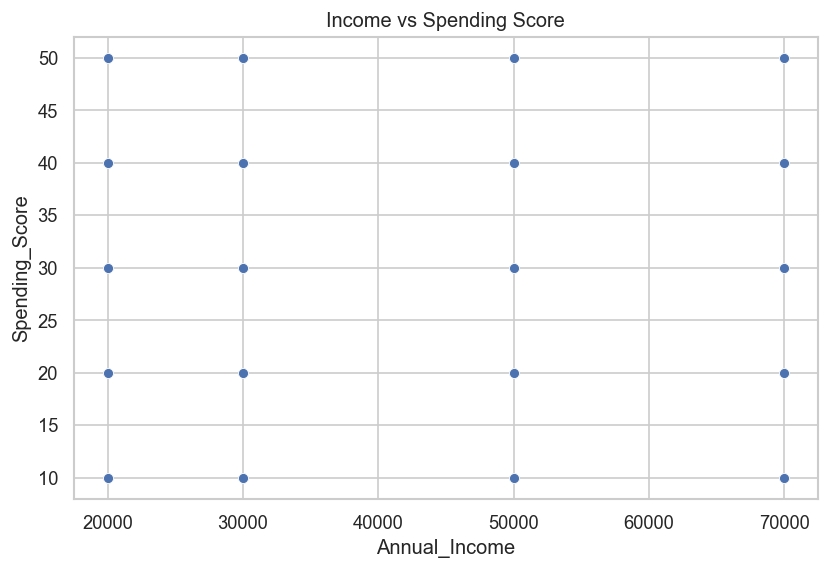

In [285]:
sns.scatterplot(
    x=df["Annual_Income"],
    y=df["Spending_Score"]
)
plt.title("Income vs Spending Score")
plt.show()


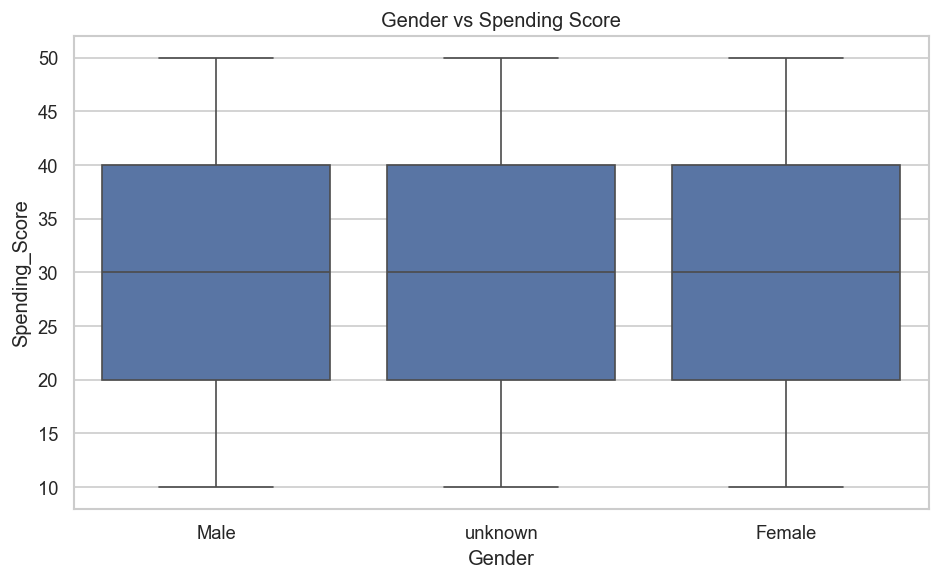

In [286]:
sns.boxplot(
    x=df["Gender"],
    y=df["Spending_Score"]
)
plt.title("Gender vs Spending Score")
plt.tight_layout()
plt.show()

In [287]:
df.to_csv("cleaned_dataset_without_outlier.csv",index=False)

# Feature Enginerring

In [288]:
df

,Customer_ID,Age,Gender,Annual_Income,Spending_Score,City,Purchased
0,1,50.0,Male,50000.0,30.0,Mumbai,No
1,2,35.0,unknown,50000.0,10.0,unknown,Yes
2,3,35.0,Male,20000.0,50.0,unknown,No
4,5,50.0,unknown,70000.0,50.0,unknown,unknown
5,6,35.0,Female,50000.0,40.0,Pune,Yes
...,...,...,...,...,...,...,...
491,492,50.0,Female,50000.0,30.0,unknown,unknown
492,493,35.0,Female,50000.0,50.0,Ahmedabad,No
493,494,50.0,Female,50000.0,50.0,unknown,No
494,495,40.0,unknown,30000.0,30.0,Ahmedabad,Yes


## Making a AgeGroup column

In [289]:
df["Age_Group"] = pd.cut(
    df["Age"],
    bins=[0, 25, 35, 50, 100],
    labels=["Young", "Adult", "Middle_Aged", "Senior"]
)

In [293]:
df["Age_Group"].value_counts()

Age_Group
Adult          191
Middle_Aged     94
Young           79
Senior           0
Name: count, dtype: int64

## Making Gender numerical

In [292]:
df['Gender_Binary'] = (df['Gender'])

df['Gender_Binary'].replace({
    "Male" : 1,
    "Female" : 0,
    "unknown" : -1
},inplace=True)

In [294]:
df['Gender_Binary']

0      1
1     -1
2      1
4     -1
5      0
      ..
491    0
492    0
493    0
494   -1
499    0
Name: Gender_Binary, Length: 364, dtype: int64

## Making cateogry for Annual_Income

In [296]:
df['Annual_Income'].value_counts()

Annual_Income
50000.0    157
30000.0     77
20000.0     71
70000.0     59
Name: count, dtype: int64

In [298]:
df['Income_Bracket'] = pd.cut(
    df['Annual_Income'],
    bins=[0, 30000, 60000, 1000000],
    labels=["Low","Medium","High"]
)

In [299]:
df['Income_Bracket']

0      Medium
1      Medium
2         Low
4        High
5      Medium
        ...  
491    Medium
492    Medium
493    Medium
494       Low
499    Medium
Name: Income_Bracket, Length: 364, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

## Income Ratio Column

In [301]:
df["Spend_Income_Ratio"] = df["Spending_Score"] / df["Annual_Income"]
df["Spend_Income_Ratio"].describe()

count    364.000000
mean       0.000846
std        0.000548
min        0.000143
25%        0.000429
50%        0.000667
75%        0.001000
max        0.002500
Name: Spend_Income_Ratio, dtype: float64

## Visualizing some plots

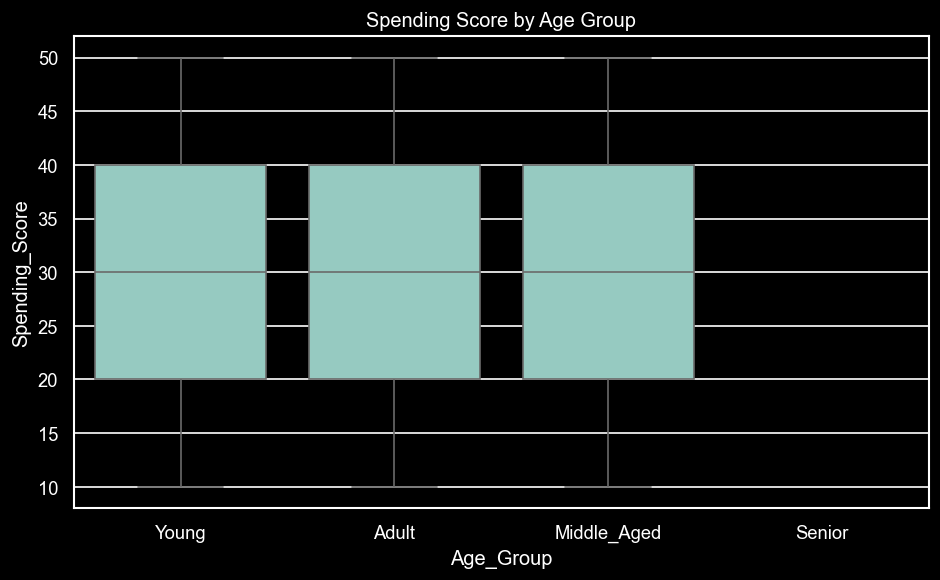

In [302]:
sns.boxplot(x=df["Age_Group"], y=df["Spending_Score"])
plt.title("Spending Score by Age Group")
plt.tight_layout()
plt.show()

In [303]:
df

,Customer_ID,Age,Gender,Annual_Income,Spending_Score,City,Purchased,Age_Group,Gender_Binary,Income_Bracket,Spend_Income_Ratio
0,1,50.0,1,50000.0,30.0,Mumbai,No,Middle_Aged,1,Medium,0.000600
1,2,35.0,-1,50000.0,10.0,unknown,Yes,Adult,-1,Medium,0.000200
2,3,35.0,1,20000.0,50.0,unknown,No,Adult,1,Low,0.002500
4,5,50.0,-1,70000.0,50.0,unknown,unknown,Middle_Aged,-1,High,0.000714
5,6,35.0,0,50000.0,40.0,Pune,Yes,Adult,0,Medium,0.000800
...,...,...,...,...,...,...,...,...,...,...,...
491,492,50.0,0,50000.0,30.0,unknown,unknown,Middle_Aged,0,Medium,0.000600
492,493,35.0,0,50000.0,50.0,Ahmedabad,No,Adult,0,Medium,0.001000
493,494,50.0,0,50000.0,50.0,unknown,No,Middle_Aged,0,Medium,0.001000
494,495,40.0,-1,30000.0,30.0,Ahmedabad,Yes,Middle_Aged,-1,Low,0.001000
